In [75]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import xgboost 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [76]:
import os 
os.chdir("C:/Users/lenovo/Desktop/jupyternotebook")

df = pd.read_csv('Hmelq.csv')
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [78]:
df.shape

(3576, 13)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [80]:
datanum=df.select_dtypes(include=['float64','int64'])
datanum.describe().T


,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [81]:
#sütundaki toplam NaN değerleri verir.Hangi sütunda kaç tane nan değer olduğunu gösterir.
df.isnull().sum().sort_values(ascending=False)

debtinc    767
derog      427
delinq     351
mortdue    314
yoj        312
ninq       303
clage      179
job        167
reason     147
clno       133
value       64
loan         0
bad          0
dtype: int64

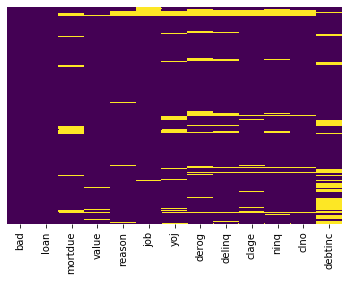

In [82]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [83]:
def eksik_deger_tablosu(data):
    eksik_deger = data.isnull().sum()
    eksik_deger_yuzde = 100 * data.isnull().sum()/len(data)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
bad,0,0.000000
loan,0,0.000000
mortdue,314,8.780761
value,64,1.789709
reason,147,4.110738
job,167,4.670022
yoj,312,8.724832
derog,427,11.940716
delinq,351,9.815436
clage,179,5.005593


In [84]:
dfnan=df.copy()
dfnan.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [85]:
dfnan['value'].unique()[0]
dfnan['value'] = dfnan['value'].fillna(dfnan['value'].unique()[0])
dfnan['clno'].unique()[0]
dfnan['clno'] = dfnan['clno'].fillna(dfnan['clno'].unique()[0])
##ilk satır değeri ile doldurduk.

In [86]:
dfnan["job"] = dfnan["job"].fillna(dfnan["job"].mode()[0])
dfnan["reason"] = dfnan["reason"].fillna(dfnan["reason"].mode()[0])

In [87]:
dfnan['derog'] = dfnan['derog'].fillna(dfnan['derog'].mean())
dfnan['delinq'] = dfnan['delinq'].fillna(dfnan['delinq'].mean())
dfnan['yoj'] = dfnan['yoj'].fillna(dfnan['yoj'].mean())
dfnan['ninq'] = dfnan['ninq'].fillna(dfnan['ninq'].mean())
dfnan['mortdue'] = dfnan['mortdue'].fillna(dfnan['mortdue'].mean())
dfnan['clage'] = dfnan['clage'].fillna(dfnan['clage'].mean())

In [88]:
dfnan.isnull().sum()

bad          0
loan         0
mortdue      0
value        0
reason       0
job          0
yoj          0
derog        0
delinq       0
clage        0
ninq         0
clno         0
debtinc    767
dtype: int64

In [89]:
dfnan.dropna(subset=["debtinc"], inplace = True)

In [90]:
dfnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 3572
Data columns (total 13 columns):
bad        2809 non-null int64
loan       2809 non-null int64
mortdue    2809 non-null float64
value      2809 non-null float64
reason     2809 non-null object
job        2809 non-null object
yoj        2809 non-null float64
derog      2809 non-null float64
delinq     2809 non-null float64
clage      2809 non-null float64
ninq       2809 non-null float64
clno       2809 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 307.2+ KB


In [91]:
Encod_data = pd.get_dummies(dfnan['reason'])
dfnan['reason'].unique()

array(['HomeImp', 'DebtCon'], dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dfnan['reason'] = lb.fit_transform(dfnan['reason'])
print(dfnan['reason'])

0       1
1       0
2       0
3       0
4       0
       ..
3548    1
3549    1
3550    0
3551    0
3572    0
Name: reason, Length: 2809, dtype: int32


In [93]:
Encod_data = pd.get_dummies(dfnan['job'])
dfnan['job'].unique()

array(['Other', 'Mgr', 'Office', 'ProfEx', 'Sales', 'Self'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dfnan['job'] = lb.fit_transform(dfnan['job'])
print(dfnan['job'])

0       2
1       2
2       2
3       2
4       2
       ..
3548    5
3549    5
3550    5
3551    5
3572    5
Name: job, Length: 2809, dtype: int32


In [95]:
dfnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 3572
Data columns (total 13 columns):
bad        2809 non-null int64
loan       2809 non-null int64
mortdue    2809 non-null float64
value      2809 non-null float64
reason     2809 non-null int32
job        2809 non-null int32
yoj        2809 non-null float64
derog      2809 non-null float64
delinq     2809 non-null float64
clage      2809 non-null float64
ninq       2809 non-null float64
clno       2809 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int32(2), int64(2)
memory usage: 285.3 KB


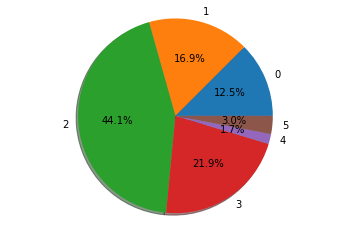

In [96]:
labels = dfnan['job'].astype('category').cat.categories.tolist()
counts = dfnan['job'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

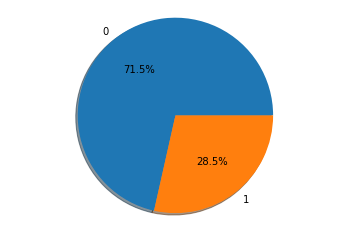

In [97]:
labels = dfnan['reason'].astype('category').cat.categories.tolist()
counts = dfnan['reason'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

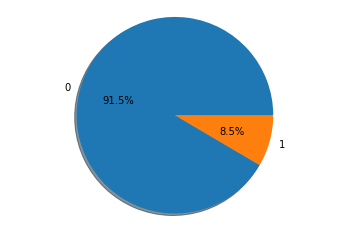

In [98]:
labels = dfnan['bad'].astype('category').cat.categories.tolist()
counts = dfnan['bad'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1B2AA7D48>,
      dtype=object)

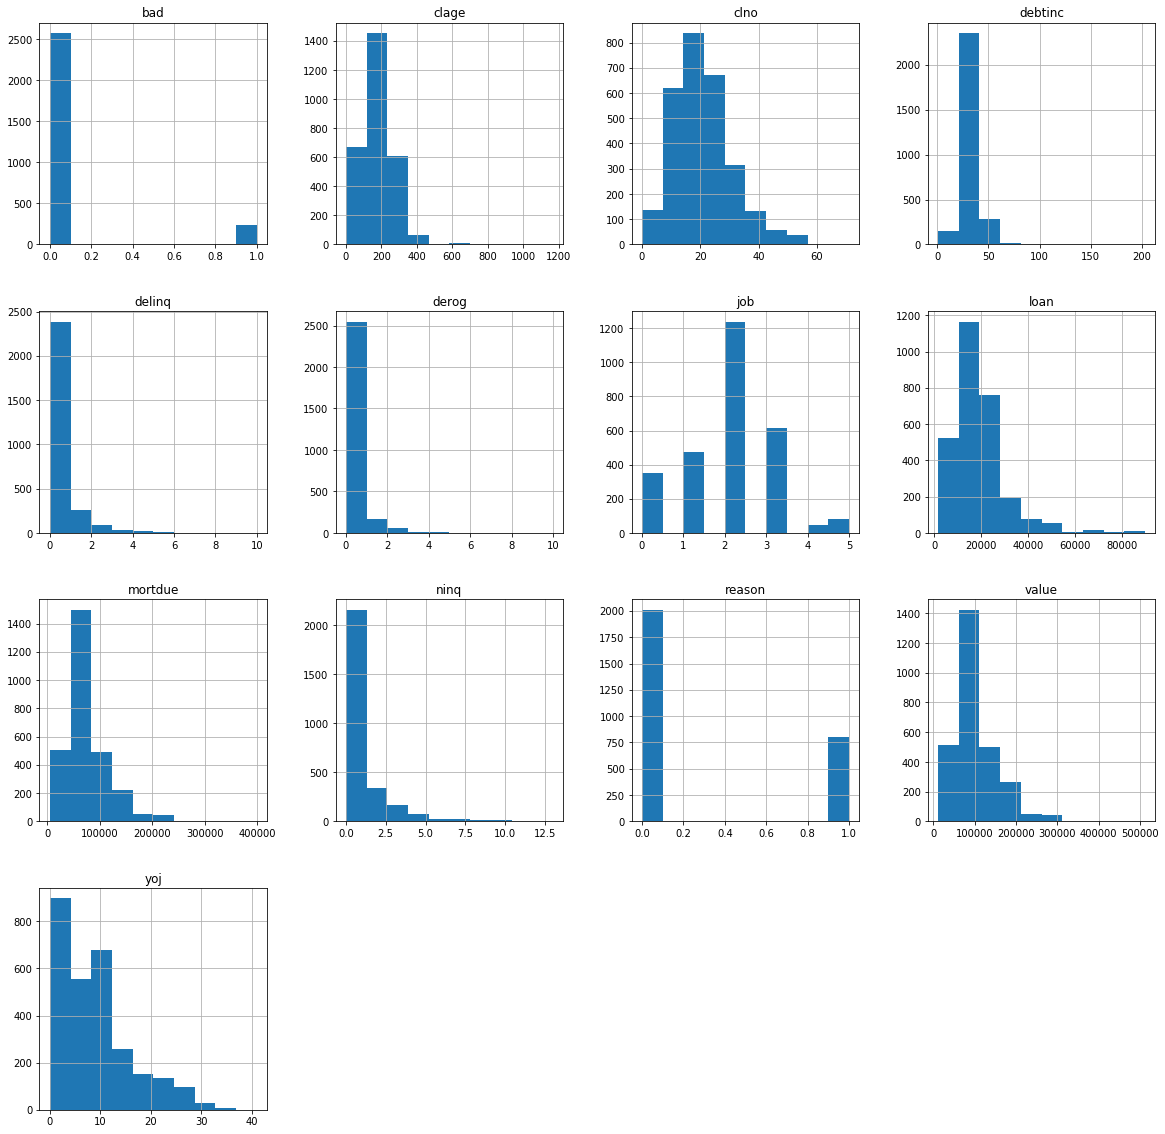

In [99]:
%matplotlib inline
dfnan.hist(figsize=(20,20))

In [100]:
dfnan["bad"].value_counts()

0    2571
1     238
Name: bad, dtype: int64

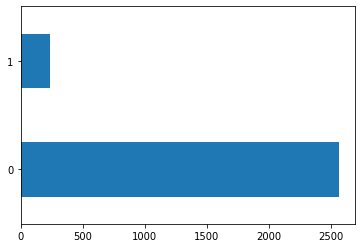

In [101]:
dfnan["bad"].value_counts().plot.barh();

In [102]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
x = dfnan["loan"]
shapiro_result = stats.shapiro(x)
alpha= 0.5
data = {'Test Statistic':[shapiro_result[0]],'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(data)
if shapiro_result[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print(result)

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.838953      0.0


In [103]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
x = dfnan["mortdue"]
shapiro_result = stats.shapiro(x)
alpha= 0.5
data = {'Test Statistic':[shapiro_result[0]],'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(data)
if shapiro_result[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print(result)

Sample does not look Gaussian (reject H0)
   Test Statistic       p-Value
0        0.876183  1.161676e-42


In [104]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
x = dfnan["value"]
shapiro_result = stats.shapiro(x)
alpha= 0.5
data = {'Test Statistic':[shapiro_result[0]],'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(data)
if shapiro_result[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print(result)

Sample does not look Gaussian (reject H0)
   Test Statistic       p-Value
0        0.870934  2.662467e-43


In [105]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
x = dfnan["reason"]
shapiro_result = stats.shapiro(x)
alpha= 0.5
data = {'Test Statistic':[shapiro_result[0]],'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(data)
if shapiro_result[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print(result)

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.565712      0.0


In [106]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
x = dfnan["job"]
shapiro_result = stats.shapiro(x)
alpha= 0.5
data = {'Test Statistic':[shapiro_result[0]],'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(data)
if shapiro_result[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print(result)

Sample does not look Gaussian (reject H0)
   Test Statistic       p-Value
0        0.893938  2.536126e-40


In [107]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
x = dfnan["yoj"]
shapiro_result = stats.shapiro(x)
alpha= 0.5
data = {'Test Statistic':[shapiro_result[0]],'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(data)
if shapiro_result[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print(result)

Sample does not look Gaussian (reject H0)
   Test Statistic       p-Value
0        0.909136  4.706798e-38


In [108]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
x = dfnan["derog"]
shapiro_result = stats.shapiro(x)
alpha= 0.5
data = {'Test Statistic':[shapiro_result[0]],'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(data)
if shapiro_result[1] > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print(result)

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.329762      0.0


In [110]:
pd.crosstab(dfnan['job'],dfnan['bad'])

bad,0,1
job,,
0,317,34
1,444,30
2,1127,112
3,572,42
4,38,9
5,73,11


In [111]:
pd.crosstab(dfnan['reason'],dfnan['bad'])

bad,0,1
reason,,
0,1843,165
1,728,73


In [112]:
dfnan.groupby('bad')['debtinc'].apply(lambda x: np.mean(x))##debtinc bazında bad değerlerinin ortalaması

bad
0    33.179142
1    40.881416
Name: debtinc, dtype: float64

In [113]:
dfnan.groupby('bad')['clno'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    21.203423
1    20.558824
Name: clno, dtype: float64

In [114]:
dfnan.groupby('bad')['clage'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    185.747185
1    155.652449
Name: clage, dtype: float64

In [115]:
dfnan.groupby('bad')['ninq'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    1.020826
1    1.452923
Name: ninq, dtype: float64

In [116]:
dfnan.groupby('bad')['delinq'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    0.249081
1    0.939594
Name: delinq, dtype: float64

In [117]:
dfnan.groupby('bad')['derog'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    0.151272
1    0.540602
Name: derog, dtype: float64

In [118]:
dfnan.groupby('bad')['yoj'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    8.970763
1    8.040576
Name: yoj, dtype: float64

In [119]:
dfnan.groupby('bad')['value'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    103026.648386
1     98897.768908
Name: value, dtype: float64

In [120]:
dfnan.groupby('bad')['mortdue'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    75659.101459
1    73400.736352
Name: mortdue, dtype: float64

In [121]:
dfnan.groupby('bad')['loan'].apply(lambda x: np.mean(x))##clno bazında bad değerlerinin ortalaması

bad
0    19192.337612
1    18136.134454
Name: loan, dtype: float64

In [139]:
def ks_2sample(column1, column2):
    from scipy import stats # if you want to import everything
    from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
    import plotly.figure_factory as ff
    from scipy.stats import ks_2samp
    import pandas as pd
    x1=pd.Series(dfnan[column1].iloc[:][dfnan[column2]==1])
    x2=pd.Series(dfnan[column1].iloc[:][dfnan[column2]==0])
    ks_results = ks_2samp(x1, x2)
    matrix_ks = [[ '','Test Statistic', 'p-value'],
             [ 'Sample Data',ks_results[0], ks_results[1]]]
    ks_table = ff.create_table(matrix_ks, index=True)
    iplot(ks_table, filename='ks-table')
    if ks_results[1] > alpha:
        print('2 samples have same distribution (fail to reject H0)')
    else:
         print('2 samples have different distribution (reject H0)')

In [140]:
ks_2sample("loan", "bad")
           

2 samples have different distribution (reject H0)


In [141]:
ks_2sample("value", "bad")

2 samples have different distribution (reject H0)


In [142]:
ks_2sample("debtinc", "bad")

2 samples have different distribution (reject H0)


In [143]:
ks_2sample("yoj", "bad")

2 samples have different distribution (reject H0)


In [144]:
ks_2sample("delinq", "bad")

2 samples have different distribution (reject H0)


In [145]:
ks_2sample("clno", "bad")

2 samples have different distribution (reject H0)


In [146]:
ks_2sample("clage", "bad")

2 samples have different distribution (reject H0)


In [147]:
ks_2sample("mortdue", "bad")

2 samples have different distribution (reject H0)


In [148]:
ks_2sample("ninq", "bad")

2 samples have different distribution (reject H0)


In [173]:
def ttest_2sample(column1, column2):
        import scipy
        from scipy import stats 
        from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
        import plotly.figure_factory as ff
        x1=pd.Series(dfnan[column1].iloc[:][dfnan[column2]==1])
        x2=pd.Series(dfnan[column1].iloc[:][dfnan[column2]==0])
        twosample_results = scipy.stats.ttest_ind(x1,x2)
        matrix_twosample = [  ['', 'Test Statistic', 'p-value'],
                  ['Sample Data', twosample_results[0], twosample_results[1]]]
        twosample_table = ff.create_table(matrix_twosample, index=True)
        iplot(twosample_table, filename='twosample-table')
        alpha = 0.05
        if twosample_results[1]<alpha:
            print("Aralarında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)")
        else:
            print("Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)")

In [174]:
ttest_2sample("value", "bad")

Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


In [175]:
ttest_2sample("loan", "bad")

Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


In [176]:
ttest_2sample("mortdue", "bad")

Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


In [177]:
ttest_2sample("reason", "bad")

Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


In [178]:
ttest_2sample("clno", "bad")

Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


In [185]:
from scipy import stats
import scipy.stats as ttest_ind
for i in dfnan.columns:
    dft = dfnan.dropna(subset=[i])
    bad_one=dft[dft["bad"]==1][i]
    bad_zero=dft[dft["bad"]==0][i]
    t, p = stats.ttest_ind(bad_one, bad_zero, equal_var=False)
    print("ttest_ind: i=%s t = %g  p = %g" % (i,t, p))
    alpha = 0.05
    if p>alpha:
        print(i," ortalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)")
    else:
        print(i," orttalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)")


ttest_ind: i=bad t = inf  p = 0
bad  orttalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)
ttest_ind: i=loan t = -4.08894  p = 4.66915e-05
loan  orttalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)
ttest_ind: i=mortdue t = -3.01974  p = 0.00259275
mortdue  orttalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)
ttest_ind: i=value t = -2.35422  p = 0.0187606
value  orttalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)
ttest_ind: i=reason t = 2.38573  p = 0.0172169
reason  orttalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)
ttest_ind: i=job t = -0.080121  p = 0.936156
job  ortalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)
ttest_ind: i=yoj t = -3.03027  p = 0.0024997
yoj  orttalaması ile  bad değişkeni arasında istati

In [179]:
y = dfnan["bad"]
X = dfnan.drop(["bad"], axis=1)
##ana datadan hedef değikeni ayırdık gerisi independent variable 

In [180]:
#statsmodels

In [181]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()
#hedef değişken y
#eformula kullanmadık constatnt vermedi
#gerçeğe ne olmuştu ben tahmin ettiğimde nasıl ilerledi

Optimization terminated successfully.
         Current function value: 0.261998
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2809
Model:                          Logit   Df Residuals:                     2797
Method:                           MLE   Df Model:                           11
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                 0.09708
Time:                        14:50:39   Log-Likelihood:                -735.95
converged:                       True   LL-Null:                       -815.08
Covariance Type:            nonrobust   LLR p-value:                 3.056e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.431e-05    8.6e-06     -3.990      0.000   -5.12e-05   -1.75e-05
mortdue    -5.402e-06   3.74e-06     -1.446      0.148   -1.27e-05    1.92e-06
value       1.002e-06   2.91e-06      0.344      0.731    -4.7e-06    6.71e-06
reason        -0.2635      0.163     -1.617      0.106      -0.583       0.056
job           -0.1039      0.065     -1.591      0.112      -0.232       0.024
yoj           -0.0234      0.011     -2.083      0.037      -0.045      -0.001
derog          0.3970      0.082      4.823      0.000       0.236       0.558
delinq         0.6615      0.071      9.285      0.000       0.522       0.801
clage         -0.0089      0.001     -8.178      0.000      -0.011      -0.007
ninq           0.0003      0.041      0.008      0.994      -0.081       0.082
clno          -0.0390      0.009     -4.347      0.000      -0.057      -0.021
debtinc        0.0250      0.006      4.235      0.000       0.013       0.037
==============================================================================
"""

In [182]:
#scikit-learn
#statsmodelsda oldugu kadar detaylı bilgi vermiyor pvalueları tam karsılaştıramaıyoruz statsmodeldan farkı
#hangi datastructurea uygun olarak model yapacağımızı bilmiyorsak scikit mantıklı farklı solverlarla çözebildiğimiz için

In [183]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
loj_model.intercept_

array([-0.00097853])

In [185]:
loj_model.coef_

array([[-3.39365434e-05, -7.31617885e-06, -1.07105743e-06,
        -2.44529836e-04, -9.22567544e-04, -6.39027377e-03,
         2.25213361e-03,  4.40671051e-03, -9.09855556e-03,
         1.02039488e-03, -6.74123848e-03,  1.79675613e-02]])

# tahmin model tuning

In [186]:
y_pred = loj_model.predict(X)

In [187]:
confusion_matrix(y, y_pred)
#datamın içindeki 0ların 2571'i doğru şeker hastası olmadığğı halde 121 kişiye şeker hastası dedim
#tp,nfilan bak buna
#confusion matrizi testte hiç göstermeğimiz modellerle yapmalıyız

array([[2571,    0],
       [ 237,    1]], dtype=int64)

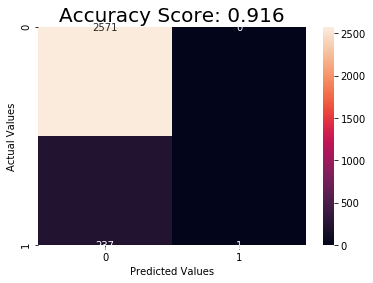

In [188]:
predictions = loj_model.predict(X)
score = round(accuracy_score(y, predictions), 3)
cm1 = confusion_matrix(y, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 20)
plt.show()

In [189]:
accuracy_score(y, y_pred)
#yüzde 77 iyi çalışan bir model

0.9156283374866501

In [190]:
print(classification_report(y, y_pred))
#model neyi ne kadar doğru yapıyor overall accuracy
#1leri ne kadar doğru tahmin ediyorum recaalll gerçekten hasta olan insanların yüzde 55ini doğru tahmin etmişim
#f1scoree overaal accuracye göre doğru düşük yani tahmin düşük
#precision ve recallun agırlıklı ortalası sonucu f1scoredur.

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2571
           1       1.00      0.00      0.01       238

    accuracy                           0.92      2809
   macro avg       0.96      0.50      0.48      2809
weighted avg       0.92      0.92      0.88      2809



In [191]:
loj_model.predict(X)[0:10]
#ilk10u istedik

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [192]:
loj_model.predict_proba(X)[0:10][:,0:2]
#probability
#biri 0 olma olasılığı diğeri 0
#benim 1 olma ihtimalim 0.08 0.91 yüksek o zaman 0
#benim 1 olma ihtimalim 0.64 0.35 düşük o zaman 1

array([[0.98092634, 0.01907366],
       [0.88726995, 0.11273005],
       [0.82816234, 0.17183766],
       [0.86615849, 0.13384151],
       [0.84715828, 0.15284172],
       [0.81345553, 0.18654447],
       [0.98098571, 0.01901429],
       [0.89435333, 0.10564667],
       [0.936731  , 0.063269  ],
       [0.87396442, 0.12603558]])

In [193]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: bad, dtype: int64

In [194]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [195]:
y_probs[0:10]

array([0.01907366, 0.11273005, 0.17183766, 0.13384151, 0.15284172,
       0.18654447, 0.01901429, 0.10564667, 0.063269  , 0.12603558])

In [199]:
y_pred = [1 if i> 0.4 else 0 for i in y_probs]
#thresholdu ben kendim de belirleyebilirim

In [200]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [201]:
confusion_matrix(y, y_pred)

array([[2563,    8],
       [ 237,    1]], dtype=int64)

In [202]:
accuracy_score(y, y_pred)

0.9127803488786045

In [203]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95      2571
           1       0.11      0.00      0.01       238

    accuracy                           0.91      2809
   macro avg       0.51      0.50      0.48      2809
weighted avg       0.85      0.91      0.87      2809



In [204]:
loj_model.predict_proba(X)[:,1][0:6]

array([0.01907366, 0.11273005, 0.17183766, 0.13384151, 0.15284172,
       0.18654447])

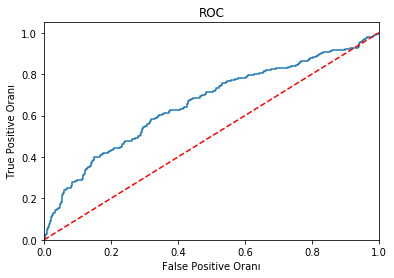

In [205]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [206]:
#yüzde 80le model kuracam yüzde 20yle dtest edecem

In [207]:
logit_roc_auc

0.5021008403361344

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state= 42)

In [209]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
y_pred  = loj_model.predict(X_test)

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       517
           1       0.00      0.00      0.00        45

    accuracy                           0.92       562
   macro avg       0.46      0.50      0.48       562
weighted avg       0.85      0.92      0.88       562



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [212]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()
#accuracy ile karşılaştırınca çok farklı sonuçlar çıkmadı demek ki randomlıkla alakası yok
#aralarında çok fazla açık varsa randomlıktan bir kereliğine özgü bu modeli verdi demek ki

0.9182182729551152

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state= 42)

In [215]:
loj = LogisticRegression(solver = "liblinear", max_iter=500)
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
print(classification_report(y_test, y_pred))
#randomlıktan gelen durum mu yoksa gerçekten anlmalı model mi yapmışım?
#crossvalidation buna cevap veriyor rastgelelik etkisini ölçüyor

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       517
           1       0.00      0.00      0.00        45

    accuracy                           0.92       562
   macro avg       0.46      0.50      0.48       562
weighted avg       0.85      0.92      0.88       562



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [217]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()
#accuracy ile karşılaştırınca çok farklı sonuçlar çıkmadı demek ki randomlıkla alakası yok
#aralarında çok fazla açık varsa randomlıktan bir kereliğine özgü bu modeli verdi demek ki

0.9182182729551152

In [350]:
datacorr=dfnan.copy()
del datacorr['bad']
del datacorr['job']
del datacorr['reason']
datacorr.cov()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
loan,1.222451e+08,8.967349e+07,1.817795e+08,10421.004059,209.359372,-314.672113,63200.138831,949.019778,9417.916503,9381.523612
mortdue,8.967349e+07,1.734185e+09,1.835047e+09,-24525.639615,-859.712284,173.535636,449755.586835,1149.088142,141900.178403,59678.692360
value,1.817795e+08,1.835047e+09,2.794349e+09,2182.526157,-1917.377406,-579.169917,787326.897922,-831.248503,157722.003576,63955.310426
yoj,1.042100e+04,-2.452564e+04,2.182526e+03,52.287923,-0.282551,0.207321,114.131821,-0.705726,0.874090,-3.298271
derog,2.093594e+02,-8.597123e+02,-1.917377e+03,-0.282551,0.366309,0.078932,-3.594373,0.111728,0.197189,0.172012
delinq,-3.146721e+02,1.735356e+02,-5.791699e+02,0.207321,0.078932,0.622264,3.996993,0.029826,0.975951,0.479806
clage,6.320014e+04,4.497556e+05,7.873269e+05,114.131821,-3.594373,3.996993,7196.900596,-11.911146,182.811894,-30.645103
ninq,9.490198e+02,1.149088e+03,-8.312485e+02,-0.705726,0.111728,0.029826,-11.911146,2.363802,1.233904,1.758136
clno,9.417917e+03,1.419002e+05,1.577220e+05,0.874090,0.197189,0.975951,182.811894,1.233904,97.321153,16.792426
debtinc,9.381524e+03,5.967869e+04,6.395531e+04,-3.298271,0.172012,0.479806,-30.645103,1.758136,16.792426,82.116882


In [352]:
datacorr.corr()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
loan,1.000000,0.194760,0.311020,0.130345,0.031286,-0.036079,0.067380,0.055828,0.086345,0.093636
mortdue,0.194760,1.000000,0.833603,-0.081446,-0.034110,0.005283,0.127308,0.017947,0.345407,0.158145
value,0.311020,0.833603,1.000000,0.005710,-0.059930,-0.013889,0.175567,-0.010228,0.302446,0.133512
yoj,0.130345,-0.081446,0.005710,1.000000,-0.064561,0.036346,0.186052,-0.063479,0.012253,-0.050335
derog,0.031286,-0.034110,-0.059930,-0.064561,1.000000,0.165326,-0.070005,0.120070,0.033026,0.031363
delinq,-0.036079,0.005283,-0.013889,0.036346,0.165326,1.000000,0.059727,0.024592,0.125411,0.067122
clage,0.067380,0.127308,0.175567,0.186052,-0.070005,0.059727,1.000000,-0.091322,0.218438,-0.039863
ninq,0.055828,0.017947,-0.010228,-0.063479,0.120070,0.024592,-0.091322,1.000000,0.081353,0.126192
clno,0.086345,0.345407,0.302446,0.012253,0.033026,0.125411,0.218438,0.081353,1.000000,0.187842
debtinc,0.093636,0.158145,0.133512,-0.050335,0.031363,0.067122,-0.039863,0.126192,0.187842,1.000000


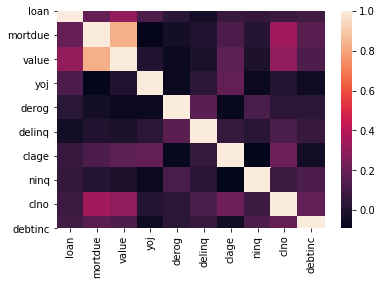

In [353]:
corr = data1.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [354]:
target=dfnan['bad'] 
features= dfnan.drop(dfnan['bad'])
corr1 = pd.concat([target, features], axis=1, keys=['target', 'features']).corr().loc['features', 'target']
c1 = corr1.abs().unstack()
c1.sort_values(ascending = False)

bad  bad        1.000000
     delinq     0.243746
     debtinc    0.236756
     derog      0.179113
     clage      0.098947
     ninq       0.078145
     yoj        0.035697
     loan       0.026212
     value      0.021694
     clno       0.018238
     job        0.015427
     mortdue    0.015185
     reason     0.014646
dtype: float64

In [357]:
##target ve diğer değişkenler arasında korelansyonu en yüksek olanlar(131 column)
c1.sort_values(ascending=True, inplace=True)
columns_above_1 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.05 and col1 != col2]

In [439]:
columns_above_1

[('bad', 'ninq'),
 ('bad', 'clage'),
 ('bad', 'derog'),
 ('bad', 'debtinc'),
 ('bad', 'delinq')]

In [440]:
dfnew=dfnan.copy()
del dfnew['mortdue']
del dfnew['clno']
del dfnew['yoj']
del dfnew['loan']
del dfnew['reason']
del dfnew['job']
del dfnew['value']

In [441]:
y = dfnew["bad"]
X = dfnew.drop(["bad"], axis=1)
##ana datadan hedef değikeni ayırdık gerisi independent variable 

In [442]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()
#hedef değişken y
#eformula kullanmadık constatnt vermedi
#gerçeğe ne olmuştu ben tahmin ettiğimde nasıl ilerledi

Optimization terminated successfully.
         Current function value: 0.277433
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2809
Model:                          Logit   Df Residuals:                     2804
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                 0.04388
Time:                        15:19:26   Log-Likelihood:                -779.31
converged:                       True   LL-Null:                       -815.08
Covariance Type:            nonrobust   LLR p-value:                 1.075e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
derog          0.3220      0.075      4.293      0.000       0.175       0.469
delinq         0.6560      0.067      9.719      0.000       0.524       0.788
clage         -0.0143      0.001    -13.931      0.000      -0.016      -0.012
ninq          -0.0280      0.041     -0.688      0.491      -0.108       0.052
debtinc       -0.0096      0.004     -2.149      0.032      -0.018      -0.001
==============================================================================
"""

In [443]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [444]:
loj_model.intercept_

array([-4.48786437])

In [445]:
loj_model.coef_

array([[ 0.39971173,  0.62373068, -0.00661911,  0.05400999,  0.07739947]])

In [446]:
y_pred = loj_model.predict(X)

In [447]:
confusion_matrix(y, y_pred)
#datamın içindeki 0ların 4448i doğru şeker hastası olmadığğı halde 121 kişiye şeker hastası dedim
#tp,nfilan bak buna
#confusion matrizi testte hiç göstermeğimiz modellerle yapmalıyız

array([[2560,   11],
       [ 198,   40]], dtype=int64)

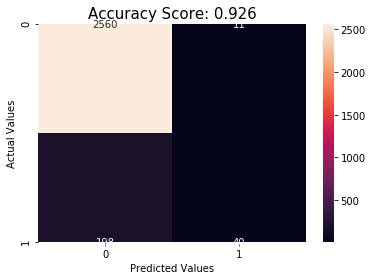

In [448]:
predictions = loj_model.predict(X)
score = round(accuracy_score(y, predictions), 3)
cm1 = confusion_matrix(y, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [449]:
accuracy_score(y, y_pred)

0.9255962976148095

In [450]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2571
           1       0.78      0.17      0.28       238

    accuracy                           0.93      2809
   macro avg       0.86      0.58      0.62      2809
weighted avg       0.92      0.93      0.90      2809



In [451]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [452]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.9412554 , 0.0587446 ],
       [0.93542697, 0.06457303],
       [0.95343019, 0.04656981],
       [0.9450874 , 0.0549126 ],
       [0.9490793 , 0.0509207 ],
       [0.9547605 , 0.0452395 ],
       [0.91010243, 0.08989757],
       [0.96472361, 0.03527639],
       [0.93543811, 0.06456189],
       [0.95181147, 0.04818853]])

In [453]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [454]:
y_probs[0:10]

array([0.0587446 , 0.06457303, 0.04656981, 0.0549126 , 0.0509207 ,
       0.0452395 , 0.08989757, 0.03527639, 0.06456189, 0.04818853])

In [455]:
y_pred = [1 if i> 0.4 else 0 for i in y_probs]
#thresholdu ben kendim de belirleyebilirim

In [456]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [457]:
confusion_matrix(y, y_pred)
#daha iyi sonuclar elde ettik 0.4 threshold ile

array([[2552,   19],
       [ 192,   46]], dtype=int64)

In [458]:
accuracy_score(y, y_pred)

0.9248843004627981

In [459]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2571
           1       0.71      0.19      0.30       238

    accuracy                           0.92      2809
   macro avg       0.82      0.59      0.63      2809
weighted avg       0.91      0.92      0.90      2809



In [460]:
loj_model.predict_proba(X)[:,1][0:6]

array([0.0587446 , 0.06457303, 0.04656981, 0.0549126 , 0.0509207 ,
       0.0452395 ])

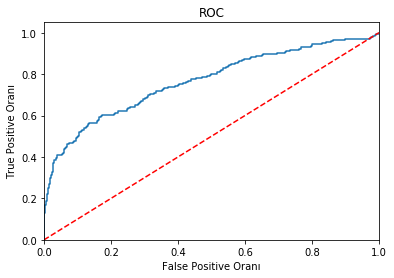

In [461]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [462]:
logit_roc_auc

0.5818943680155844

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state= 42)

In [464]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [465]:
y_pred  = loj_model.predict(X_test)

In [466]:
print(classification_report(y_test, y_pred))
#randomlıktan gelen durum mu yoksa gerçekten anlmalı model mi yapmışım?
#crossvalidation buna cevap veriyor rastgelelik etkisini ölçüyor

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       517
           1       0.75      0.20      0.32        45

    accuracy                           0.93       562
   macro avg       0.84      0.60      0.64       562
weighted avg       0.92      0.93      0.91       562



In [467]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()
#accuracy ile karşılaştırınca çok farklı sonuçlar çıkmadı demek ki randomlıkla alakası yok
#aralarında çok fazla açık varsa randomlıktan bir kereliğine özgü bu modeli verdi demek ki

0.9271804511278194

In [468]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#SelectKBest sınıfını uygulaarak en iyi 10 feature ı elde etme
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#Daha iyi görselleştirme için 2 veri çerçevesini birleştirme
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

     Specs        Score
2    clage  1076.934382
4  debtinc   381.980301
1   delinq   337.679199
0    derog   179.198189
3     ninq    38.462299


In [469]:
dfp=dfnew.copy()
del dfp['ninq']

In [470]:
y = dfp["bad"]
X = dfp.drop(["bad"], axis=1)
##ana datadan hedef değikeni ayırdık gerisi independent variable 

In [471]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()
#hedef değişken y
#eformula kullanmadık constatnt vermedi
#gerçeğe ne olmuştu ben tahmin ettiğimde nasıl ilerledi

Optimization terminated successfully.
         Current function value: 0.277519
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2809
Model:                          Logit   Df Residuals:                     2805
Method:                           MLE   Df Model:                            3
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                 0.04359
Time:                        15:20:02   Log-Likelihood:                -779.55
converged:                       True   LL-Null:                       -815.08
Covariance Type:            nonrobust   LLR p-value:                 2.540e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
derog          0.3154      0.075      4.227      0.000       0.169       0.462
delinq         0.6556      0.068      9.703      0.000       0.523       0.788
clage         -0.0142      0.001    -13.911      0.000      -0.016      -0.012
debtinc       -0.0106      0.004     -2.542      0.011      -0.019      -0.002
==============================================================================
"""

In [477]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [478]:
loj_model.intercept_

array([-4.38063626])

In [479]:
loj_model.coef_

array([[ 0.40395782,  0.61903393, -0.0067817 ,  0.07712353]])

In [480]:
y_pred = loj_model.predict(X)

In [481]:
confusion_matrix(y, y_pred)
#datamın içindeki 0ların 4448i doğru şeker hastası olmadığğı halde 121 kişiye şeker hastası dedim
#tp,nfilan bak buna
#confusion matrizi testte hiç göstermeğimiz modellerle yapmalıyız

array([[2561,   10],
       [ 197,   41]], dtype=int64)

In [482]:
accuracy_score(y, y_pred)
#yüzde 77 iyi çalışan bir model

0.926308294766821

In [483]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2571
           1       0.80      0.17      0.28       238

    accuracy                           0.93      2809
   macro avg       0.87      0.58      0.62      2809
weighted avg       0.92      0.93      0.90      2809



In [484]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [485]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.93695598, 0.06304402],
       [0.93063401, 0.06936599],
       [0.9545166 , 0.0454834 ],
       [0.94413373, 0.05586627],
       [0.94531821, 0.05468179],
       [0.95346171, 0.04653829],
       [0.90392932, 0.09607068],
       [0.96947942, 0.03052058],
       [0.9345552 , 0.0654448 ],
       [0.95098625, 0.04901375]])

In [486]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [487]:
y_probs[0:10]

array([0.06304402, 0.06936599, 0.0454834 , 0.05586627, 0.05468179,
       0.04653829, 0.09607068, 0.03052058, 0.0654448 , 0.04901375])

In [488]:
y_pred = [1 if i> 0.4 else 0 for i in y_probs]

In [489]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [490]:
confusion_matrix(y, y_pred)

array([[2553,   18],
       [ 191,   47]], dtype=int64)

In [491]:
accuracy_score(y, y_pred)

0.9255962976148095

In [492]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2571
           1       0.72      0.20      0.31       238

    accuracy                           0.93      2809
   macro avg       0.83      0.60      0.64      2809
weighted avg       0.91      0.93      0.91      2809



In [493]:
loj_model.predict_proba(X)[:,1][0:6]

array([0.06304402, 0.06936599, 0.0454834 , 0.05586627, 0.05468179,
       0.04653829])

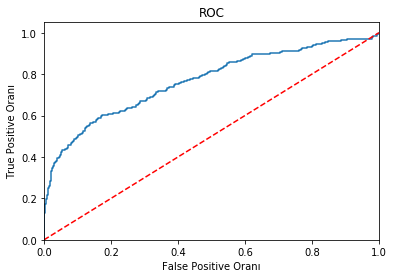

In [494]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [495]:
logit_roc_auc

0.5841896852089727

In [496]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state= 42)

In [497]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [498]:
y_pred  = loj_model.predict(X_test)

In [499]:
print(classification_report(y_test, y_pred))
#randomlıktan gelen durum mu yoksa gerçekten anlmalı model mi yapmışım?
#crossvalidation buna cevap veriyor rastgelelik etkisini ölçüyor

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       517
           1       0.75      0.20      0.32        45

    accuracy                           0.93       562
   macro avg       0.84      0.60      0.64       562
weighted avg       0.92      0.93      0.91       562

